In [1]:
import tensorflow as tf
tf.__version__

'2.6.1'

In [4]:
import tensorflow as tf
import cv2
import numpy as np
import os,sys,random

np.random.seed(10)

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import models, layers


def readData(path=r"C:/Users/15019751250/sdxx/trashSorting1/dataset", trainRation=0.9):
    images=[]
    labels=[]
    subdirs=os.listdir(path)
    subdirs.sort()
    print(subdirs)
    classes=len(subdirs)
    
    for subdir in range(classes):
        
        for index in os.listdir(os.path.join(path, subdirs[subdir])):
            
            indexDir = os.path.join(path, subdirs[subdir], index)
            sys.stdout.flush()
            print("label-->dir: {}-->{}".format(subdirs[subdir], indexDir))
            
            for indexdir in os.listdir(indexDir):
                imagePath=os.path.join(indexDir, indexdir)
                img=cv2.imread(imagePath)
                img=cv2.resize(img, dsize=(32,32), interpolation=cv2.INTER_AREA)
                images.append(img)
                labels.append(subdir)
    
    print("读取到的图像与标签集的形状")            
    print(np.array(images).shape)
    print(np.array(labels).shape)
    
    (trainImages, trainLabels),(testImages, testLabels)=makeTrainTestData(images, labels)
    
    
#     print("trainImages: ", trainImages.shape)
#     print("trainLabels: ", trainLabels.shape)
#     print("testImages: ", testImages.shape)
#     print("testLabels: ", testLabels.shape)
    
    np.save("trainImages.npy", trainImages)
    np.save("trainLabels.npy", trainLabels)
    np.save("testImages.npy", testImages)
    np.save("testLabels.npy", testLabels)
    
    return (trainImages, trainLabels),(testImages, testLabels)

In [5]:
import random
np.random.seed(10)

def makeTrainTestData(images, labels, trainRation=0.9):
    c=list(zip(images, labels))
    
    random.shuffle(c)
    
    images, labels= zip(*c)
    
    train_num=int(trainRation*len(images))
    trainImages, trainLabels=images[:train_num], labels[:train_num]
    testImages, testLabels= images[train_num:], labels[train_num:]
    
    return((np.array(trainImages),np.array(trainLabels)), (np.array(testImages),np.array(testLabels)))

In [6]:
def loadData():
    try:
        trainImages=np.load("C:/Users/15019751250/sdxx/trashSorting1/trainImages.npy")
        trainLabels=np.load("C:/Users/15019751250/sdxx/trashSorting1/trainLabels.npy")
        testImages=np.load("C:/Users/15019751250/sdxx/trashSorting1/testImages.npy")
        testLabels=np.load("C:/Users/15019751250/sdxx/trashSorting1/testLabels.npy")
    
    except:
        (trainImages, trainLabels),(testImages, testLabels)=readData()
        
    return (trainImages, trainLabels),(testImages, testLabels)

In [7]:
def ProcessDataset(trainImages,testImages, trainLabels, testLabels):
    lengthTrain=len(trainImages)
    lengthTest=len(testImages)
    
    proTrainimages= trainImages.astype("float32")/255
    proTestimages= testImages.astype("float32")/255
    
    proTrainlabels=np_utils.to_categorical(trainLabels)
    proTestlabels=np_utils.to_categorical(testLabels)
    
    return (proTrainimages, proTestimages),(proTrainlabels, proTestlabels)

In [8]:
if __name__== "__main__":
    
    (trainImages, trainLabels),(testImages, testLabels)=loadData()
    print("以下是读取到的数据集的形状：")
    print("trainImages: ", trainImages.shape)
    print("testImages: ", testImages.shape)
    print("trainLabels: ", trainLabels.shape)
    print("testLabels: ", testLabels.shape)
    print()

以下是读取到的数据集的形状：
trainImages:  (49144, 32, 32, 3)
testImages:  (5461, 32, 32, 3)
trainLabels:  (49144,)
testLabels:  (5461,)



In [9]:
print("以下是预处理后的数据集的形状：")
(proTrainimages, proTestimages),(proTrainlabels, proTestlabels) = \
ProcessDataset(trainImages,testImages, trainLabels, testLabels)
print("proTrainimages: ", proTrainimages.shape)
print("proTestimages: ", proTestimages.shape)
print("proTrainlabels: ", proTrainlabels.shape)
print("proTestlabels: ", proTestlabels.shape)

以下是预处理后的数据集的形状：
proTrainimages:  (49144, 32, 32, 3)
proTestimages:  (5461, 32, 32, 3)
proTrainlabels:  (49144, 10)
proTestlabels:  (5461, 10)


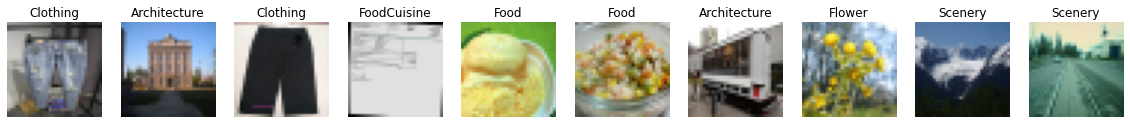

In [10]:
import matplotlib.pyplot as plt

#转为RGB
trainImages = trainImages[...,::-1]
testImages = testImages[...,::-1]

#显示图片
label_dict={0:'Animals',1:'Architecture',2:'Clothing',3:'Flower',4:'Food',5:'Portrait',6:'Scenery',7:'Transportation',8:'BillReceipt',9:'FoodCuisine'}
fig,axs=plt.subplots(1,10,figsize=(20,2))
for i in range(10):
    axs[i].imshow(trainImages[i+100],cmap='gray')
    axs[i].set_title(label_dict[trainLabels[i+100]])
    axs[i].axis('off')   
plt.show()

In [12]:
def creatModel() :
    model= models.Sequential()
    model.add(layers.Conv2D(filters=48,
                            kernel_size=(3, 3),
                            input_shape=(32, 32,3),
                            strides=1,
                            data_format='channels_last',
                            activation='relu',
                            padding='same'))
    model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),
                            data_format = 'channels_last'))
    model.add(layers.Conv2D(filters=64, 
                            kernel_size=(3, 3),
                            data_format='channels_last',
                            activation='relu',
                            padding='same'))
    # model.add(layers.Dropout(0.25))
    model.add(layers.MaxPooling2D(pool_size=(2, 2),
                                 data_format = 'channels_last'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(units=1000, activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(units=10,
                           activation='softmax'))
    model.summary()

    return model

In [13]:
if __name__== "__main__":
    print("创建一个卷积神经网络")
    model=creatModel()

创建一个卷积神经网络
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1344      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        27712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)    

In [14]:
# 设置优化器和学习率
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10,
    decay_rate=0.96,
    staircase=True)
#定义SGD优化器（使用学习率衰减调参方法）
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
#配置模型的计算参数
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#设置检查点保存回调函数
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
                    filepath="C:/Users/15019751250/sdxx/trashSorting1/checkpoints/model.{epoch:02d}-{val_accuracy:.2f}.h5",
                    save_weights_only=False,
                    monitor='val_accuracy',
                    save_best_only=True)
#配置模型的训练参数并启动训练
model.fit(proTrainimages,
          proTrainlabels,
          epochs=10, 
          validation_data=(proTestimages,proTestlabels), 
          batch_size=16,  
          callbacks=[checkpoint_callback])

Epoch 1/10
3072/3072 [==============================] - 132s 43ms/step - loss: 0.8762 - accuracy: 0.7036 - val_loss: 0.7875 - val_accuracy: 0.7493
Epoch 2/10
3072/3072 [==============================] - 127s 41ms/step - loss: 0.7979 - accuracy: 0.7350 - val_loss: 0.7874 - val_accuracy: 0.7493
Epoch 3/10
3072/3072 [==============================] - 130s 42ms/step - loss: 0.7975 - accuracy: 0.7330 - val_loss: 0.7874 - val_accuracy: 0.7493
Epoch 4/10
3072/3072 [==============================] - 128s 42ms/step - loss: 0.7949 - accuracy: 0.7325 - val_loss: 0.7874 - val_accuracy: 0.7493
Epoch 5/10
3072/3072 [==============================] - 129s 42ms/step - loss: 0.7988 - accuracy: 0.7326 - val_loss: 0.7874 - val_accuracy: 0.7493
Epoch 6/10
3072/3072 [==============================] - 130s 42ms/step - loss: 0.7966 - accuracy: 0.7346 - val_loss: 0.7874 - val_accuracy: 0.7493
Epoch 7/10
3072/3072 [==============================] - 125s 41ms/step - loss: 0.7963 - accuracy: 0.7322 - val_loss: 0

In [15]:
bestModel=tf.keras.models.load_model('C:/Users/15019751250/sdxx/trashSorting1/checkpoints/model.03-0.58.h5')
test_lss, test_acc = model.evaluate(proTestimages, proTestlabels)

171/171 [==============================] - 2s 11ms/step - loss: 0.7874 - accuracy: 0.7493


In [16]:
predictImages=model.predict(proTestimages)

In [17]:
predictLabels=np.argmax(predictImages, axis=1)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt 

y_true = testLabels
y_pred = predictLabels

# 计算混淆矩阵
conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=predictLabels)
print(conf_matrix)
print()

# 计算分类指标
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_true, y_pred, target_names=target_names))

tf.Tensor(
[[   0   11   52    3   29    4   53    2    0    0]
 [   0  761   38    0   17    5  238    0    0    0]
 [   0   15 1448    2   29    1  110    5    1   14]
 [   0    3    1   44   15    2   62    0    0    2]
 [   0   12   24    8  338    0   33    1    0    1]
 [   1   10    8    4   11   24   37    0    0    0]
 [   0  111   48    6   11    1 1225    2    1    2]
 [   0    1   45    0    9    0   27   14    1   26]
 [   0   42   41    1    9    0  108    0    9    0]
 [   0    0    3    0    0    0    8    2    0  229]], shape=(10, 10), dtype=int32)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.79      0.72      0.75      1059
           2       0.85      0.89      0.87      1625
           3       0.65      0.34      0.45       129
           4       0.72      0.81      0.76       417
           5       0.65      0.25      0.36        95
           6       0.64      0.87      0.74     

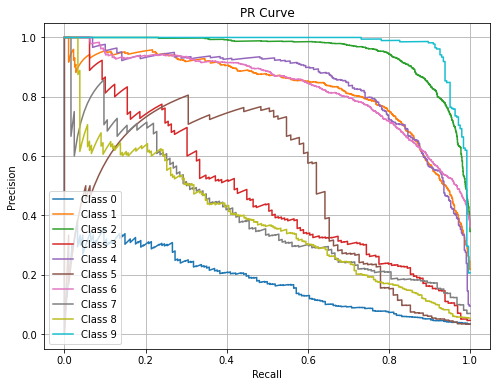

In [19]:
# 假设有N个类别
N = proTestlabels.shape[1]

# print(N)
precision = dict()
recall = dict()
thresholds = dict()

for i in range(N):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(proTestlabels[:, i], predictImages[:, i])
    
# 绘制PR曲线
plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(recall[i], precision[i], label=f'Class {i}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR Curve')
plt.grid(True)
plt.show()